#  Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 
Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



In [503]:
#importing pandas 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import time

In [504]:
#reading the dataset

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [505]:
#Combine test and train into one file
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [506]:
#dimensions of the dataset
train.shape

(8523, 13)

In [507]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [508]:
#first few lines of data
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [509]:
#Check missing values:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [502]:
#Numerical data summary:
data.describe()

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,...,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,0.036261,0.597782,0.340609,0.011618,0.013730,0.000528,0.000528,0.000352,0.000880,0.000704,...,0.280232,0.326703,0.393065,0.109312,0.327759,0.280232,0.127090,0.654286,0.108784,0.109840
std,0.186956,0.490389,0.473956,0.107167,0.116378,0.022976,0.022976,0.018761,0.029656,0.026528,...,0.449152,0.469049,0.488474,0.312057,0.469438,0.449152,0.333103,0.475642,0.311395,0.312718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Number of unique values in each:
data.apply(lambda x: len(x.unique()))

In [511]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

F

# univariate graphs

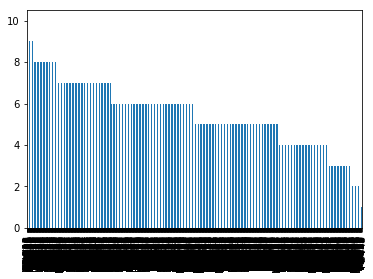

In [510]:
#check total categories of Item_Identifier
len(train['Item_Identifier'].value_counts())

train['Item_Identifier'].value_counts().plot.bar()

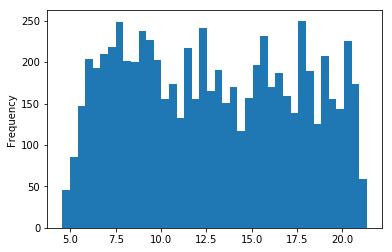

In [491]:
train['Item_Weight'].plot.hist(bins=40)

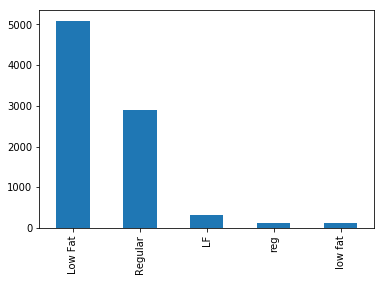

In [464]:
print(len(train['Item_Fat_Content'].value_counts()))

train['Item_Fat_Content'].value_counts().plot.bar()

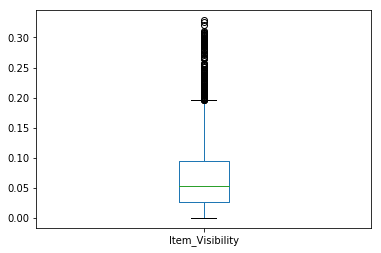

In [495]:
train['Item_Visibility'].plot.box()

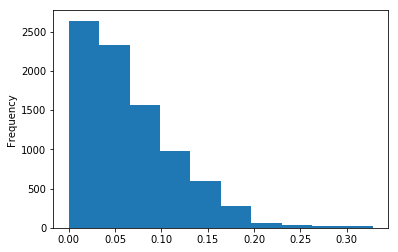

In [512]:
train['Item_Visibility'].plot.hist()

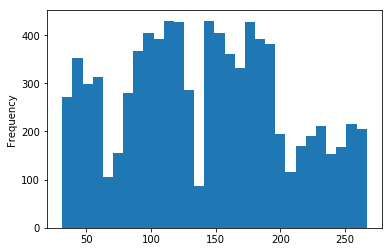

In [488]:
train['Item_MRP'].plot.hist(bins=30)

In [485]:
print("\nGet relevant percentiles and see their distribution")
train['Item_MRP'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


Get relevant percentiles and see their distribution


0.0     31.29000
0.1     52.79560
0.2     84.68924
0.3    102.13320
0.4    118.76504
0.5    143.01280
0.6    159.43252
0.7    177.78280
0.8    194.48572
0.9    231.20048
1.0    266.88840
Name: Item_MRP, dtype: float64

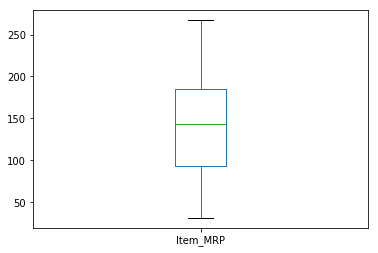

In [496]:
train['Item_MRP'].plot.box()

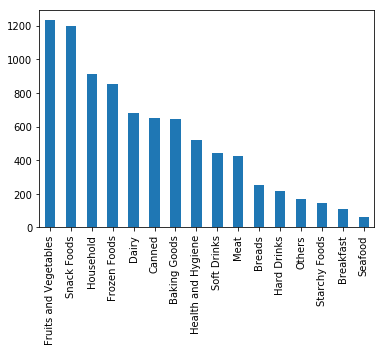

In [513]:
train['Item_Type'].value_counts().plot.bar()

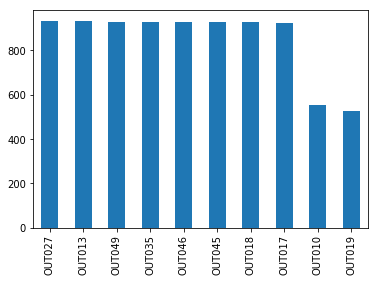

In [468]:
train['Outlet_Identifier'].value_counts().plot.bar()

9


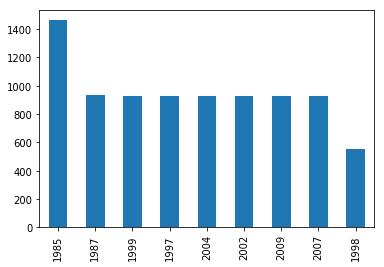

In [482]:
train['Outlet_Establishment_Year'].value_counts().plot.bar()

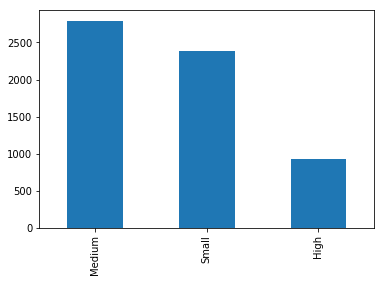

In [469]:
train['Outlet_Size'].value_counts().plot.bar()

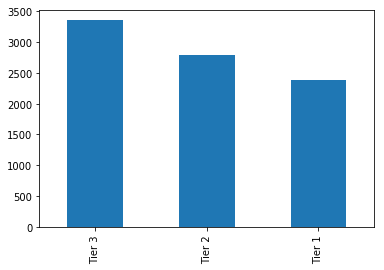

In [470]:
train['Outlet_Location_Type'].value_counts().plot.bar()

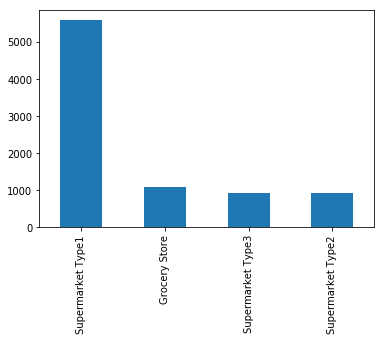

In [471]:
train['Outlet_Type'].value_counts().plot.bar()

# Bivariate Analysis

In [497]:
correlations = train.corr()
print(correlations)

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


It looks like the item sales are corelated with Item MRP and item visibility most.

In [ ]:
plt.scatter(product_like_rate, train['Item_Outlet_Sales'])
plt.xlabel("product like rate")
plt.ylabel("VIP")

# 2. Data Cleaning

### Imputation


In [516]:
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print('Orignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight[x])
print('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439


KeyError: 'FDP10'

In [518]:
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
DRB24                  8.785
DRB25                 12.300
DRB48                 16.750
DRC01                  5.920
DRC12                 17.850
DRC13                  8.260
DRC24                 17.850
DRC25                  5.730
DRC27                 13.800
DRC36                 13.000
DRC49                  8.670
DRD01                 12.100
DRD12                  6.960
DRD13                 15.000
DRD15                 10.600
DRD24                 13.850
DRD25                  6.135
DRD27                 18.750
DRD37                  9.800
DRD49                  9.895
DRD60                 15.700
DRE01                 10.100
DRE03                 19.600
DRE12                  4.590
DRE13                  6.280
...                      ...
NCX05                 15.200
NCX06         

In [519]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print ('Mode for each Outlet_Type:')
print (outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print('\nOrignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print(sum(data['Outlet_Size'].isnull()))

C:\Users\prita\Anaconda3\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: '<' not supported between instances of 'str' and 'float'

# 2. Feature Engineering:
### Step1: Consider combining categories in Outlet_Type

In [520]:
#Check the mean sales by type:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


### Step2: Modify Item_Visibility

In [522]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

print('Number of 0 values initially: %d'%sum(miss_bool))
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg[x])
print('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

SyntaxError: invalid syntax (<ipython-input-522-9e82c66b6cb8>, line 7)

In [419]:
#making the test dataset
x_test=pd.read_csv("test.csv")

In [420]:
x_test.shape

(5681, 11)

In [421]:
x_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [422]:
len(x_test['Item_Identifier'].value_counts())

1543

Since the number of columns in test data is 1588 while train data is 1605, so it was neccesary to figure out which category of variable is not available in test data. So, there are 16 Item identifier which are missing in test data.

In [423]:
#find list of item which are in training but not in test dataset
test_item = set()
test_item.update(x_test['Item_Identifier'])
train_item = set()
train_item.update(train['Item_Identifier'])

extra_list = []
extra_list = ([item for item in train_item if item not in test_item])
print(extra_list)

temp = train[train['Item_Identifier'].isin(extra_list)]
print(len(temp))

['FDX04', 'FDU19', 'FDO52', 'FDA04', 'FDO19', 'FDL10', 'FDL34', 'NCL31', 'FDW13', 'FDX20', 'FDG24', 'NCQ06', 'DRE49', 'FDT07', 'NCY18', 'FDG33']
140


In [ ]:
There are total 140 rows with 16 Item indentifier in training dataset which are not there in test. As the number is not large we can remove them from train dataset

In [ ]:
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print 'Orignal #missing: %d'% sum(miss_bool)
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight[x])
print 'Final #missing: %d'% sum(data['Item_Weight'].isnull())

In [ ]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print 'Mode for each Outlet_Type:'
print outlet_size_mode

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print '\nOrignal #missing: %d'% sum(miss_bool)
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print sum(data['Outlet_Size'].isnull())

In [ ]:
#sales by outlet type
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

In [ ]:
#Modify visibility
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

print 'Number of 0 values initially: %d'%sum(miss_bool)
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg[x])
print 'Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0)

In [424]:
len(x_test['Item_Fat_Content'].value_counts())

5

The number of types in Item_Identifier column in test data in 1543 and train data is 1559. That means 16 categories are missing in test data for Item_Identifier column.

In [425]:
len(x_test['Item_Type'].value_counts())

16

In [426]:
len(x_test['Outlet_Identifier'].value_counts())

10

In [427]:
len(x_test['Outlet_Establishment_Year'].value_counts())

9

In [428]:
len(x_test['Outlet_Size'].value_counts())

3

In [429]:
len(x_test['Outlet_Location_Type'].value_counts())

3

In [430]:
len(x_test['Outlet_Type'].value_counts())

4

In [431]:
train = train[~train['Item_Identifier'].isin(extra_list)]
train.shape

(8383, 12)

In [432]:
train=pd.get_dummies(train)

In [433]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [434]:
x_test=pd.get_dummies(x_test)

In [435]:
x_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,1999,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300,0.038428,87.3198,2007,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,14.600,0.099575,241.7538,1998,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,7.315,0.015388,155.0340,2007,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,NaN,0.118599,234.2300,1985,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [436]:
x_test.shape

(5681, 1588)

In [437]:
x_train=train.drop('Item_Outlet_Sales', axis=1)

In [438]:
y_train=train['Item_Outlet_Sales']

In [439]:
from sklearn.linear_model import LinearRegression

In [440]:
lreg=LinearRegression()

In [441]:
x_train.fillna(0,inplace=True)

In [442]:
x_test.fillna(0,inplace=True)

In [443]:
x_test.shape

(5681, 1588)

In [444]:
#This wont work if there are NaN and missing values, Also make sure to convert categorical data to dummies
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [445]:
#predictions on test data
t0=time()
y_pred=lreg.predict(x_test)
print("\nPredictions time:", round(time()-t0, 3), "s")


Predictions time: 0.105 s


In [446]:
#performance of training model - r2
lreg.score(x_train,y_train)

0.6441020516288769

In [447]:
#write submission file
data=pd.read_csv("SampleSubmission.csv")
data.head()


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


In [448]:
data.shape

(5681, 3)

In [450]:
len(y_pred)

5681

In [451]:
data['Item_Outlet_Sales'] = y_pred

In [453]:
data.to_csv("Submission.csv")